<a href="https://colab.research.google.com/github/bhnunes/FT043/blob/main/Atividade%203/Lista_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
from scipy.stats import binom
import scipy.stats as stats

**RA :197225**

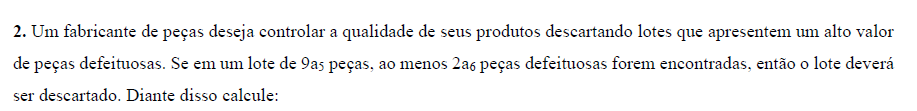

**(a)** A probabilidade de um lote ser rejeitado no caso em que uma peça defeituosa ocorre com probabilidade de 5%.

Utilizando da distribuição Binomial, considerando, temos que os valore aceitos são de 0 a 24

$\ P(x\ge 25)=1-\sum_{i=0}^{24}\binom{92}{i}p^{i}(1-p)^{92-i} $

In [32]:
prob_cumulativa = stats.binom.cdf(25-1, 92, 0.05)
prob_rejeicao = 1 - prob_cumulativa

print(f'A probabilidade de o lote ser rejeitado é {prob_rejeicao:.20f}')

A probabilidade de o lote ser rejeitado é 0.00000000000243594034


**(b)** A probabilidade de um lote ser rejeitado no caso em que uma peça defeituosa ocorre com probabilidade de 12%.

In [33]:
prob_cumulativa = stats.binom.cdf(25-1, 92, 0.12)
prob_rejeicao = 1 - prob_cumulativa

print(f'A probabilidade de o lote ser rejeitado é {prob_rejeicao:.20f}')

A probabilidade de o lote ser rejeitado é 0.00006084272445650019


**(c)** A probabilidade de um lote ser rejeitado no caso em que uma peça defeituosa ocorre com probabilidade de 2a3%.

In [34]:
prob_cumulativa = stats.binom.cdf(25-1, 92, 0.27)
prob_rejeicao = 1 - prob_cumulativa

print(f'A probabilidade de o lote ser rejeitado é {prob_rejeicao:.20f}')

A probabilidade de o lote ser rejeitado é 0.52461594148513424063


**(d)** A probabilidade de um lote ser rejeitado no caso em que uma peça defeituosa ocorre com probabilidade de 3a5%.

In [35]:
prob_cumulativa = stats.binom.cdf(25-1, 92, 0.32)
prob_rejeicao = 1 - prob_cumulativa

print(f'A probabilidade de o lote ser rejeitado é {prob_rejeicao:.20f}')

A probabilidade de o lote ser rejeitado é 0.86599167910847207885


(e) Trace a função distribuição de probabilidade para cada um dos casos expressos nos itens (a), (b), (c) e (d).

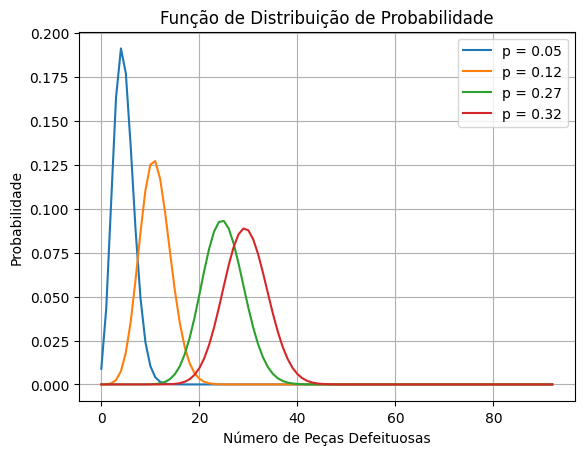

In [36]:
# prompt: Trace a função distribuição de probabilidade para cada um dos casos expressos nos itens (a), (b), (c) e (d).

import matplotlib.pyplot as plt

# Probabilidades de defeito para cada caso
probabilidades_defeito = [0.05, 0.12, 0.27, 0.32]

# Número de peças no lote
n = 92

# Número máximo de peças defeituosas permitidas
k = 24


for p in probabilidades_defeito:
  # Calcula a probabilidade para cada número de peças defeituosas (de 0 a 92)
  probabilidades = [stats.binom.pmf(i, n, p) for i in range(n + 1)]

  # Plota a função de distribuição de probabilidade
  plt.plot(range(n + 1), probabilidades, label=f'p = {p}')


plt.xlabel('Número de Peças Defeituosas')
plt.ylabel('Probabilidade')
plt.title('Função de Distribuição de Probabilidade')
plt.legend()
plt.grid(True)
plt.show()


**3.** A lei de Benford se originou a partir de uma interessante observação do físico Frank Benford nos anos 1930. Ele observou que, em muitas aplicações, a distribuição de probabilidade do primeiro dígito significativo dos números observados não é uniforme, ou seja, há dígitos mais prováveis que outros. Mais precisamente, a lei de Benford indica que o primeiro dígito de um número pode ser modelado por uma variável aleatória discreta D, de modo que a função distribuição de probabilidade de D é dada por:

$\ f_{D}(d) = log_{10}(1+\frac{1}{d})$

**d**=1..9

**(a)** Esboce no Python a função distribuição de probabilidade associada à lei de Benford

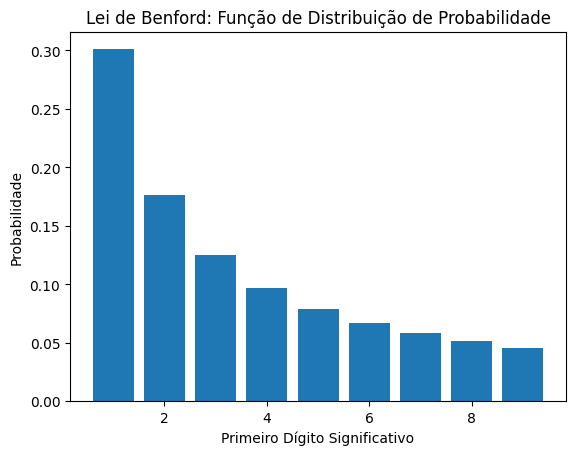

In [38]:
# prompt: (a) Esboce no Python a função distribuição de probabilidade associada à lei de Benford

import matplotlib.pyplot as plt
import numpy as np

# Função de distribuição de probabilidade de Benford
def benford_pdf(d):
  return np.log10(1 + 1/d)

# Digitos significativos possíveis (1 a 9)
digitos = np.arange(1, 10)

# Calcula as probabilidades para cada dígito
probabilidades = [benford_pdf(d) for d in digitos]

# Plota a função de distribuição de probabilidade
plt.bar(digitos, probabilidades)
plt.xlabel('Primeiro Dígito Significativo')
plt.ylabel('Probabilidade')
plt.title('Lei de Benford: Função de Distribuição de Probabilidade')
plt.show()


**(b)** Mostre que 𝑓𝐷(𝑑) satisfaz as condições para ser uma variável aleatória.

In [39]:
sum=0

for i in probabilidades:
  sum+=i

print(f'A soma das probabilidades é {sum}')

A soma das probabilidades é 1.0


Como a soma de todas as probabilidades é 1, podemos garantir que a função satisfaz as condições para ser uma variável aleatória. (Ver prova teórica nas folhas anexas ao google classroom)

**(c)** Considerando a lei de Benford. Calcule a probabilidade do primeiro dígito ser um número par e a probabilidade do primeiro dígito ser um número ímpar.

Para esse caso, precisamos apenas calcular as somas de probabilidades para números ímpares e pares no intervalo d=1...9:

In [41]:
sum_par=0
sum_impar=0
for i in range(len(probabilidades)):
  if i%2==0:
    sum_par+=probabilidades[i]
  else:
    sum_impar+=probabilidades[i]

print(f'A probabilidade do primeiro dígito ser par é {sum_par}')
print(f'A probabilidade do primeiro dígito ser ímpar é {sum_impar}')


A probabilidade do primeiro dígito ser par é 0.6088994158582678
A probabilidade do primeiro dígito ser ímpar é 0.39110058414173215


**(d)** Calcule a esperança e a variância para a lei de Benton.

In [43]:
# Calcula a esperança
esperanca = np.sum([d * p for d, p in zip(digitos, probabilidades)])

# Calcula a variancia
variancia = np.sum([(d - esperanca)**2 * p for d, p in zip(digitos, probabilidades)])

print(f"Esperança (média): {esperanca:.4f}")
print(f"Variância: {variancia:.4f}")


Esperança (média): 3.4402
Variância: 9.0995


**(e)** Verifique no Python que a média e a variância calculadas para números gerados a partir de D convergem para o os valores de esperança e variância calculados no item (d).

In [45]:
# prompt: (e) Verifique no Python que a média e a variância calculadas para números gerados a partir de D convergem para o os valores de esperança e variância calculados no item (d).

from scipy.stats import rv_discrete

# Função de distribuição de probabilidade de Benford
def benford_pdf(d):
  return np.log10(1 + 1/d)

# Digitos significativos possíveis (1 a 9)
digitos = np.arange(1, 10)

# Calcula as probabilidades para cada dígito
probabilidades = [benford_pdf(d) for d in digitos]

# Cria uma variável aleatória discreta usando a lei de Benford
dist_benford = rv_discrete(values=(digitos, probabilidades))

# Número de amostras a serem geradas
num_amostras = 100000

# Gera números aleatórios seguindo a lei de Benford
amostras = dist_benford.rvs(size=num_amostras)

# Calcula a média e variância das amostras
media_amostras = np.mean(amostras)
variancia_amostras = np.var(amostras)

print(f"Média das amostras: {media_amostras:.4f}")
print(f"Variância das amostras: {variancia_amostras:.4f}")

# Calcula a esperança e a variancia teórica da lei de Benford
esperanca = np.sum([d * p for d, p in zip(digitos, probabilidades)])
variancia = np.sum([(d - esperanca)**2 * p for d, p in zip(digitos, probabilidades)])

print(f"Esperança teórica: {esperanca:.4f}")
print(f"Variância teórica: {variancia:.4f}")

# Verifica a convergência
print(f"Diferença entre média das amostras e esperança teórica: {abs(media_amostras - esperanca):.4f}")
print(f"Diferença entre variância das amostras e variância teórica: {abs(variancia_amostras - variancia):.4f}")


Média das amostras: 3.4558
Variância das amostras: 6.0613
Esperança teórica: 3.4402
Variância teórica: 6.0565
Diferença entre média das amostras e esperança teórica: 0.0156
Diferença entre variância das amostras e variância teórica: 0.0048
